# **New York Electricity Price**

**Esteban Javier Berumen Nieto**  
*04 Agosto 2024*


### **Objetivo**
Pronosticar el precio que podria tener la electricidad, en los proximos meses, en el estado de New York, asi como entender como el precio de la electiricidad nos ayuda a aa tender como se comportan las series de tiempo de las ventas y ganacias; y la cantidad de usarios que se tienen en el periodo, asi como nos ayuda a comprender el impacto de la estacionalidad en estas series de tiempo 

### **Librerias**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsforecast.models import SeasonalNaive
from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage
import math
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

### **Datos**

In [30]:
df = pd.read_excel('New York.xlsx')
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('Date', inplace = True)
df.drop(columns = ['year', 'month'], inplace= True)
df_Price = df.drop(columns=['stateDescription', 'sectorName', 'customers', 'revenue', 'sales'])

Text(0.5, 1.0, 'Precio de la Electricidad')

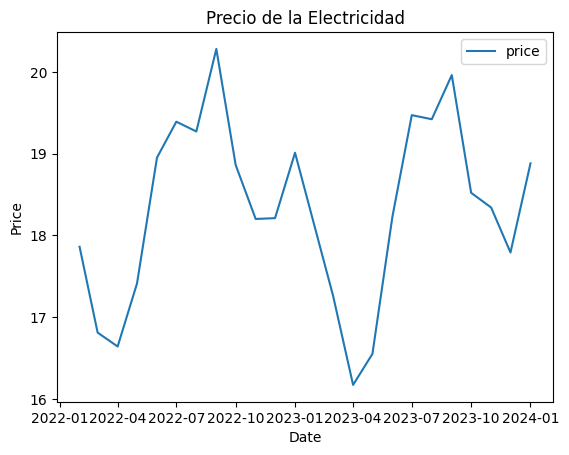

In [44]:
sns.lineplot(data = df_Price[-24:])
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Precio de la Electricidad')

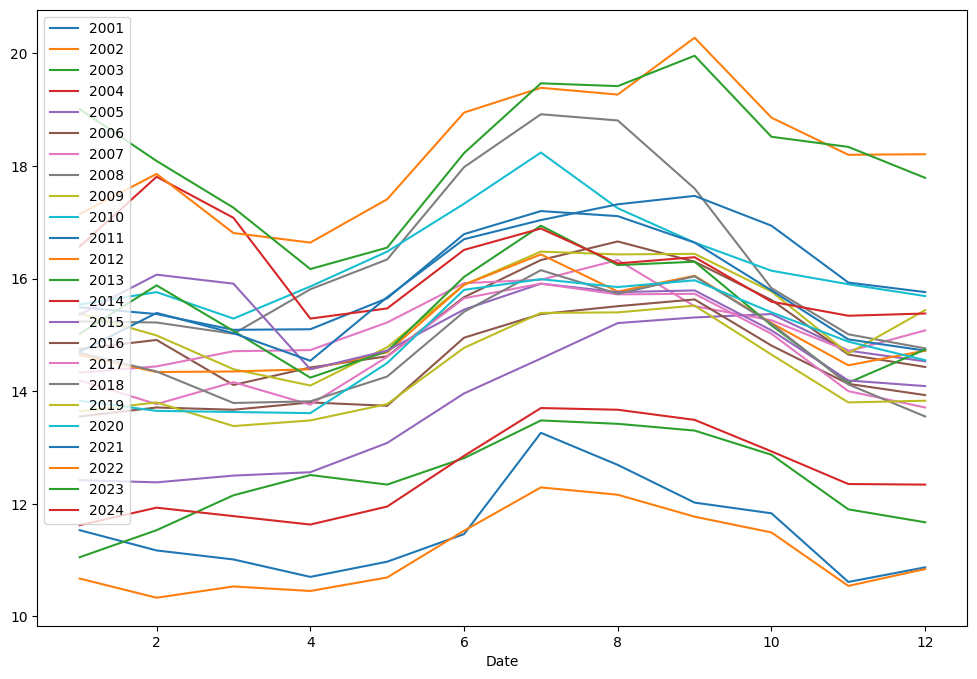

In [32]:
piv_index = getattr(df_Price.index, 'year')
piv_seson = getattr(df_Price.index, 'month')
piv = pd.pivot_table(df_Price, index = piv_seson, columns=piv_index, values= df_Price)
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_index))

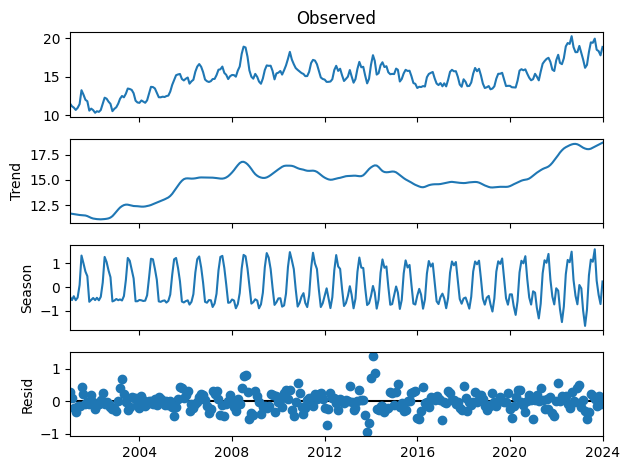

In [33]:
stl = STL(df_Price, seasonal=11, trend = 13)
res = stl.fit()
fig = res.plot()

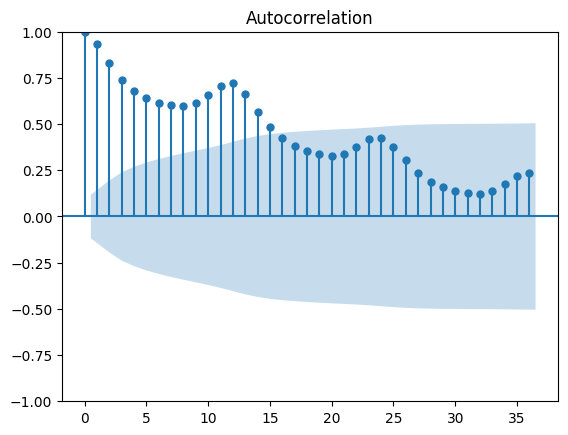

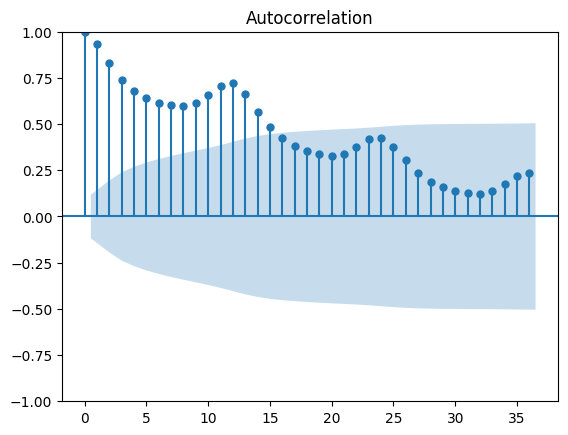

In [40]:
plot_acf(df_Price, lags= 36)

([], [])

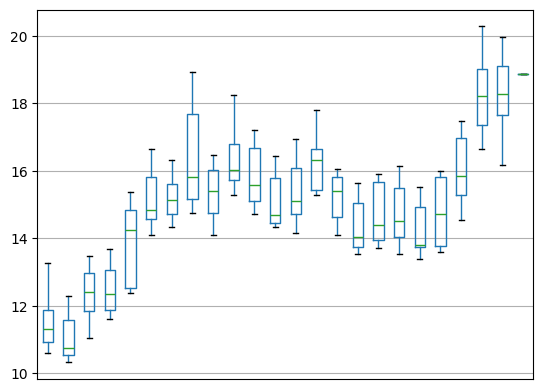

In [38]:
piv.boxplot()
plt.xticks([])

Gracias a las visualizacione anteriores podemos observar varias cosas como que gracias a la tendencia podriamos creer que la serie esta en un periodo de crecimiento pero si observamos la estacionalidad veremos como mas bien estamos llegando a un punto en el que veremos como la serie volvera a bajar, tambien vemos como incluso podemos ver como tiene mas relevacia lo que ocurrio hace 10-13 meses que lo currido hace 5-8 meses podriamos implicar que esto pueda ser dado la temperatura o incluso los periodos escolares y vacionales, ya que observamos que siempre se presenta una alza en los precios desde el mes de junio hasta aproximadamente el mes de agosto donde empizan con una baja hasta el mes de noviembre 

In [34]:
df_Price.describe()

,price
count,277.00000
mean,14.93296
std,1.97915
min,10.33000
25%,13.80000
50%,15.07000
75%,15.98000
max,20.28000


### **Estimacion a Criterio**

En la paguina de conEdison se publica "La factura de los clientes residenciales de electricidad de Nueva York que utilizan 280 kilovatios hora aumentaría $3.85, y llegaría a $94.00, lo que significa un aumento del 4.3 %."